In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [166]:
X, y = fetch_california_housing(return_X_y=True)

In [167]:
import urllib.request

data_path = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'

def download_read_data(path):
    data_path = urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(data_path)

    return data

In [168]:
df = download_read_data(data_path)

In [169]:
display(df.head(), df.shape)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


(20640, 10)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [171]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [172]:
train_data, test_data = train_test_split(df, test_size=0.1, random_state=20)

train_data.shape, test_data.shape

((18576, 10), (2064, 10))

In [173]:
cal_train = train_data.copy()

### Checking Missing Values

In [174]:
train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [175]:
miss_total_bedrooms = train_data['total_bedrooms'].isnull().sum()
perc = (miss_total_bedrooms / len(train_data)) * 100
print(f'Total missing values in total_bedrooms: {perc}')

Total missing values in total_bedrooms: 1.0012919896640826


In [176]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

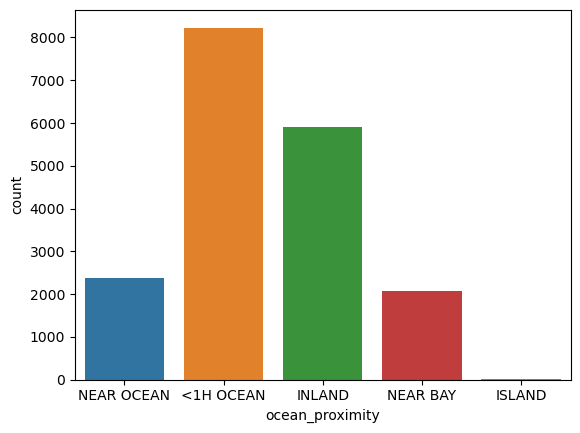

In [177]:
sns.countplot(x='ocean_proximity', data=train_data)
plt.show()

### Checking Correlation

In [178]:
corr = train_data.corr(numeric_only=True)
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685433
total_rooms           0.133927
housing_median_age    0.105237
households            0.065508
total_bedrooms        0.049672
population           -0.026109
longitude            -0.048622
latitude             -0.142543
Name: median_house_value, dtype: float64

<Axes: >

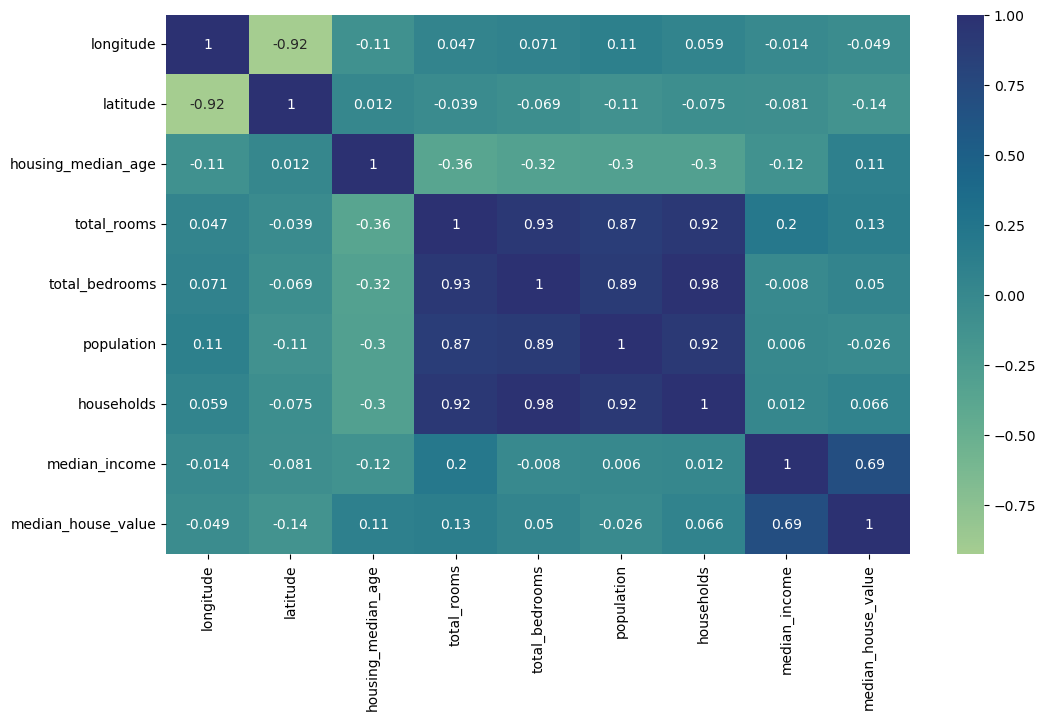

In [179]:
plt.figure(figsize=(12, 7))
sns.heatmap(corr, annot=True, cmap='crest')

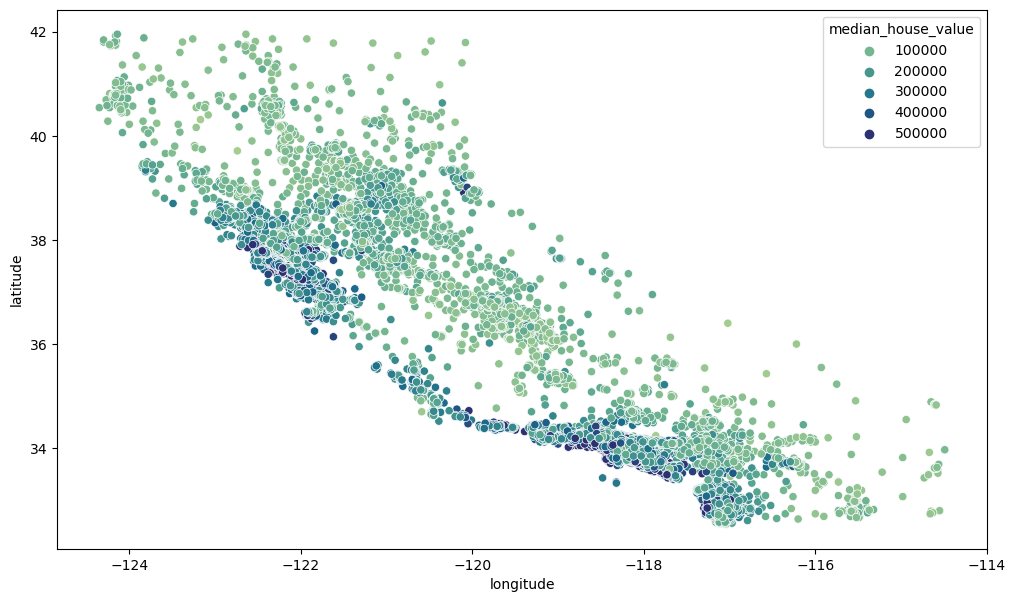

In [180]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=train_data, x='longitude', y='latitude', hue='median_house_value', palette='crest')
plt.show()

<b>Observation:</b> 
<p>Houses that are near the beach are more expensive, which makes sense.</p>

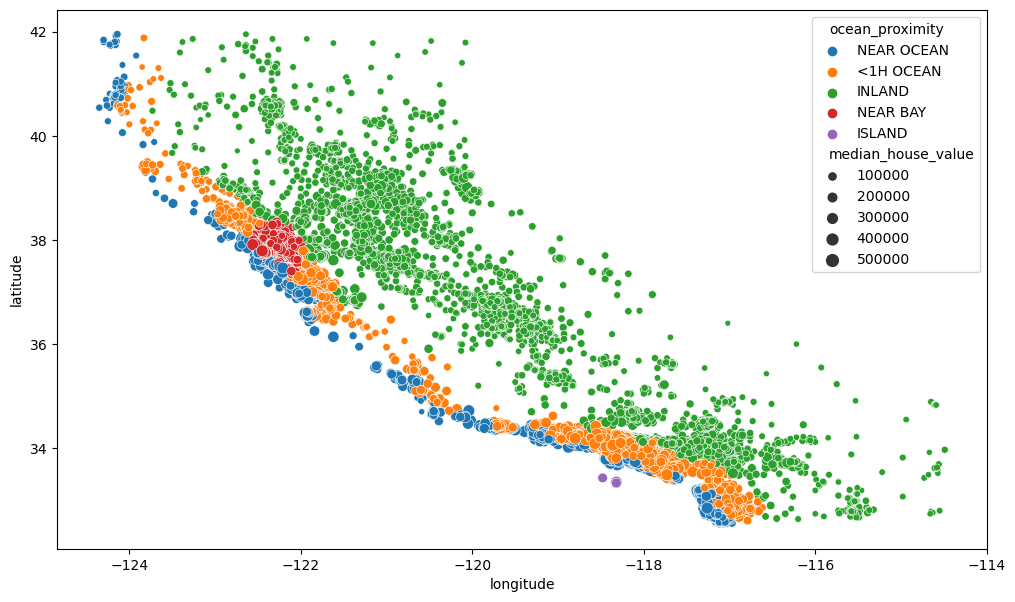

In [181]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=train_data, x='longitude', y='latitude', hue='ocean_proximity', size='median_house_value')
plt.show()

<b>Observation:</b>
<p>All houses near the ocean are very expensive compared to other areas.</p>

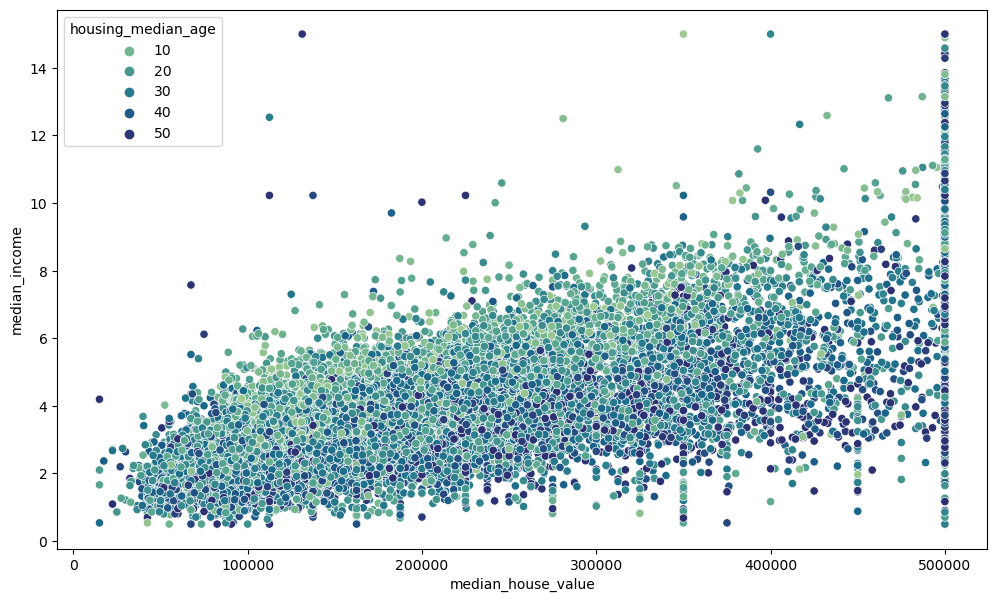

In [182]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=train_data, x='median_house_value', y='median_income', hue='housing_median_age', palette='crest')
plt.show()

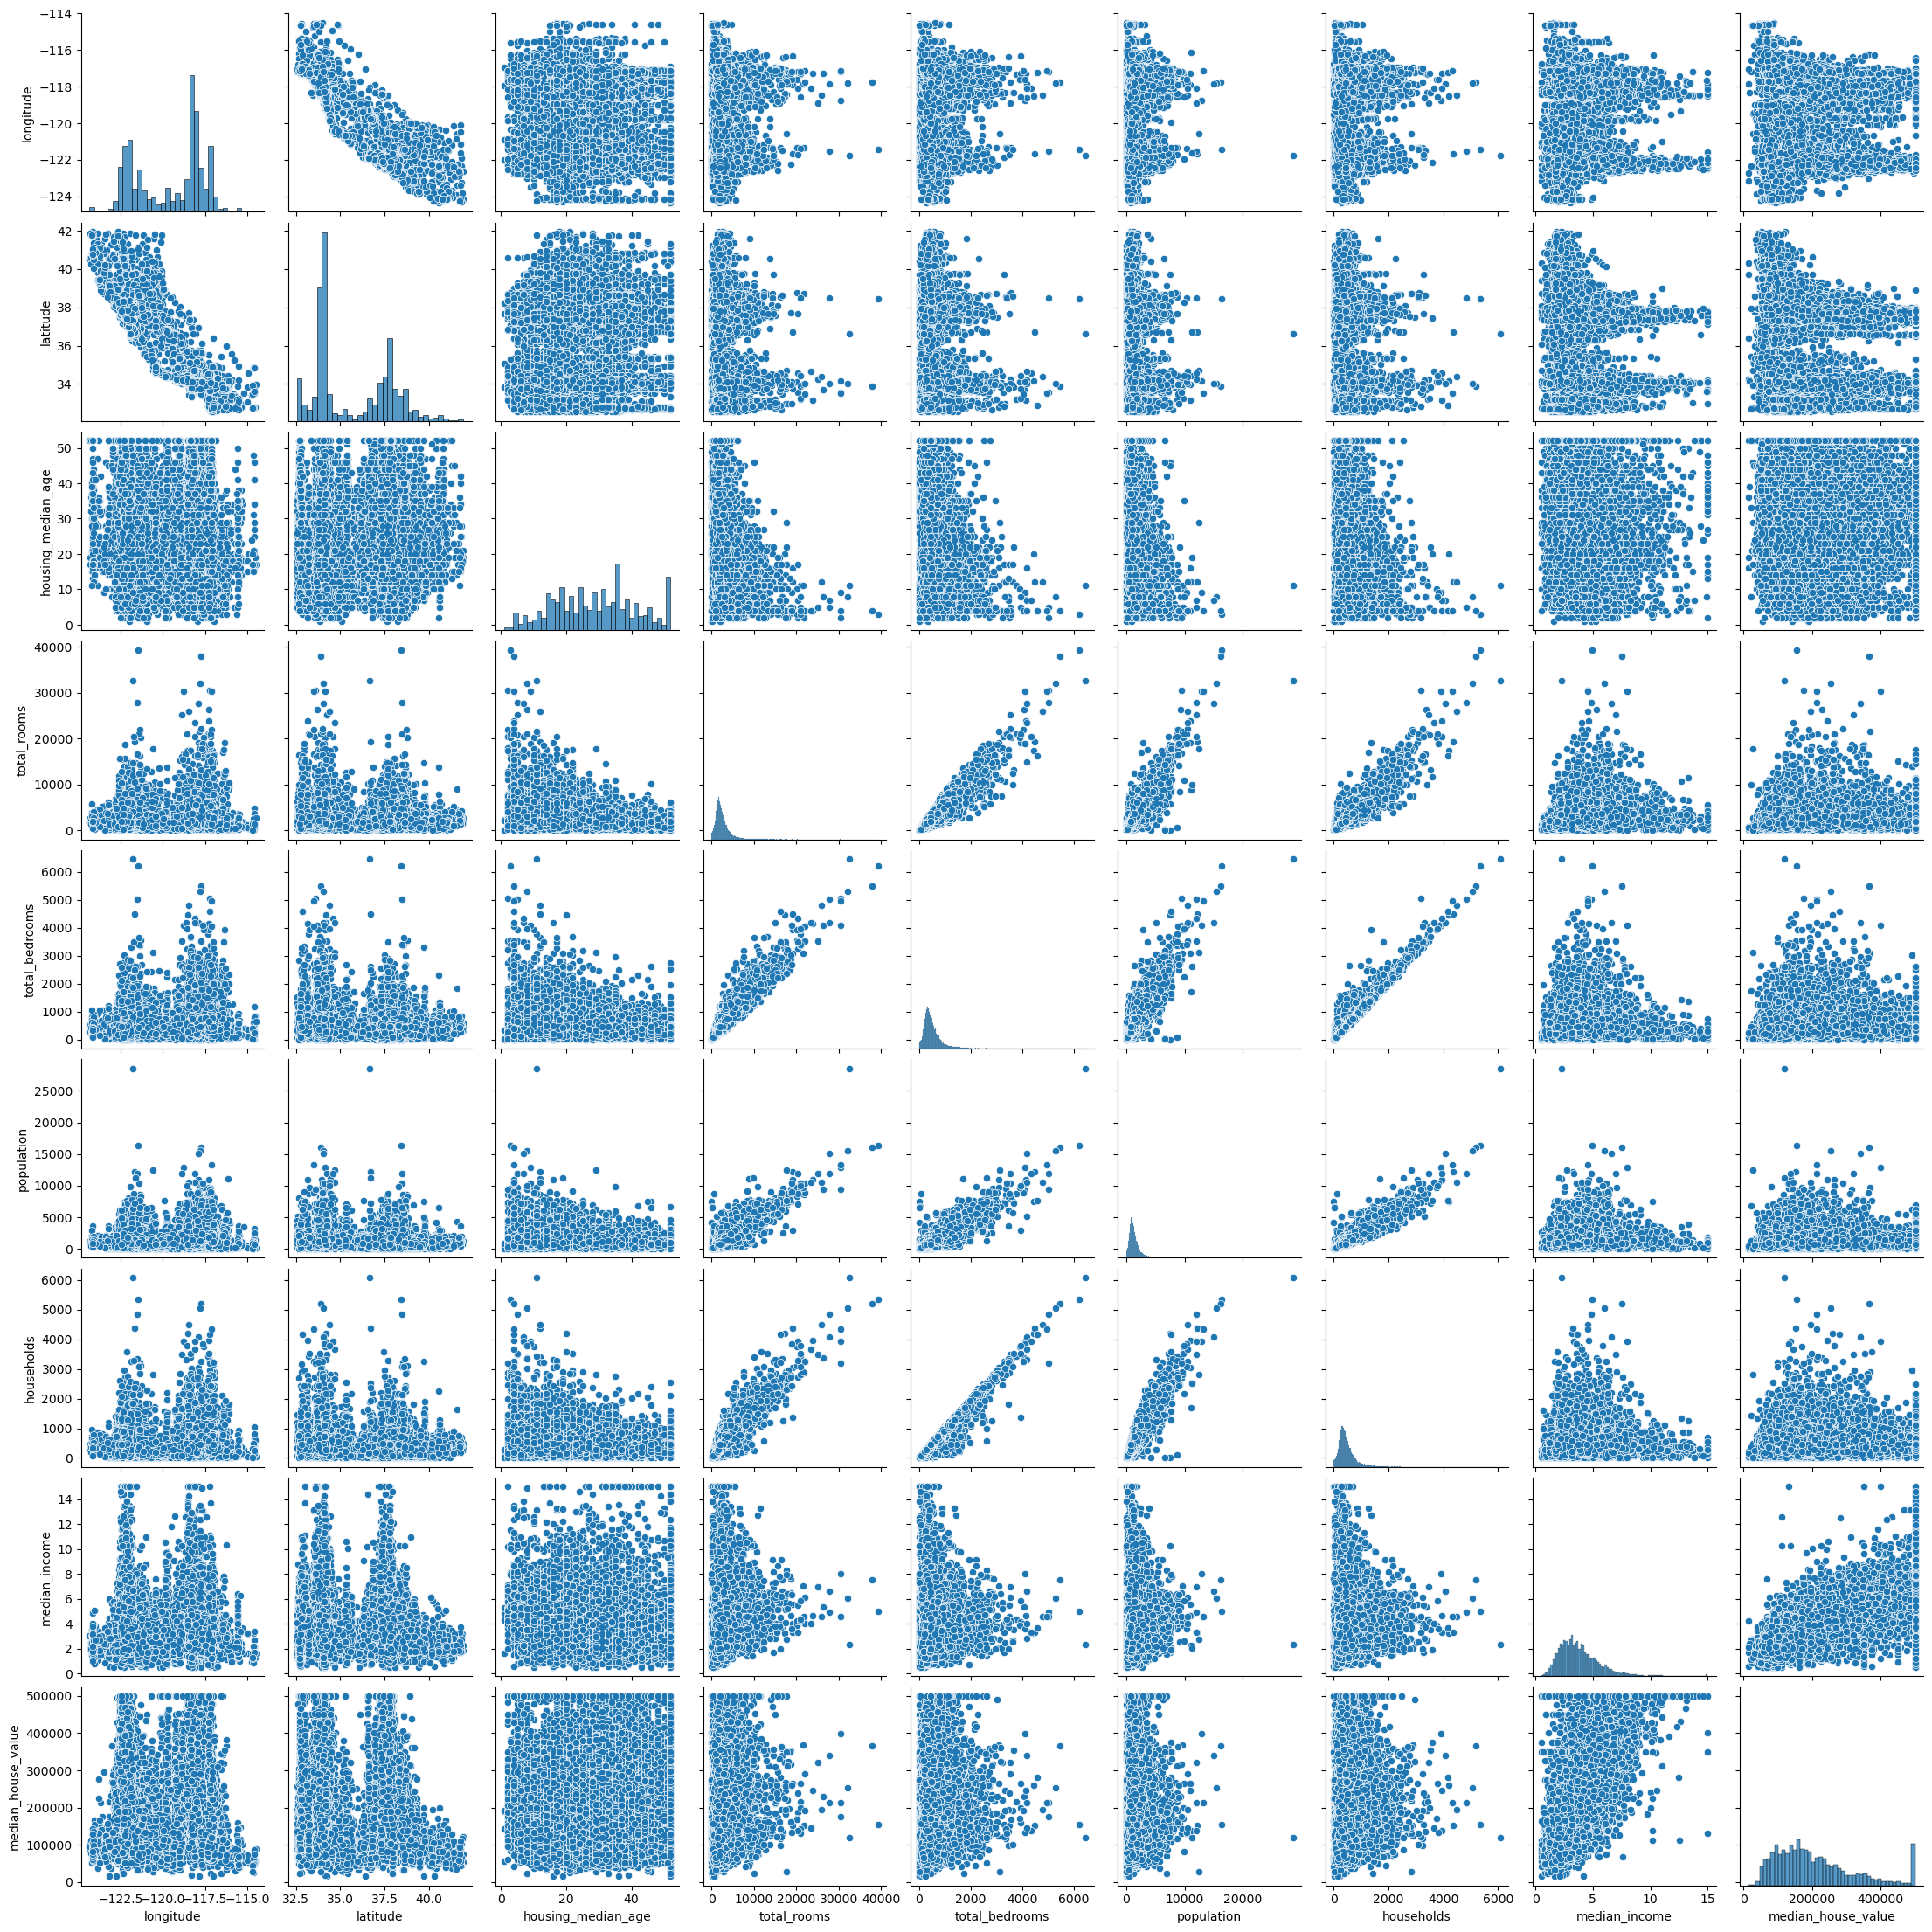

In [183]:
sns.pairplot(train_data)
plt.show()

In [184]:
X_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

### Handling Missing Values

In [185]:
def handle_missing_values(input_df, col_name):
    mean_imputer = SimpleImputer(strategy='mean')
    input_df[col_name] = mean_imputer.fit_transform(input_df[[col_name]])

    return input_df

In [186]:
train_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [187]:
df_imputed = handle_missing_values(train_data, 'total_bedrooms')
df_imputed.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Encoding Categorical Features

In [188]:
X_train['ocean_proximity'].value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

In [189]:
cat_feat = X_train['ocean_proximity']
cat_feat.value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

<p>Handling categorical features with mapping</p>

In [190]:
feat_map = {
    '<1H OCEAN': 0,
    'INLAND': 1,
    'NEAR OCEAN': 2,
    'NEAR BAY': 3,
    'ISLAND': 4
}

cat_feat_encoded = cat_feat.map(feat_map)

In [191]:
cat_feat_encoded.head()

8101     2
9757     0
16837    2
11742    1
1871     1
Name: ocean_proximity, dtype: int64

<p>Handling categorical features with OneHotEncoding</p>

In [192]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(input_df):
    ohe = OneHotEncoder()
    output = ohe.fit_transform(input_df)

    # Outcome of ohe is a sparse matrix. 
    # Convert it to a dense matrix
    output = output.toarray()

    return output


In [193]:
cat_feats = X_train[['ocean_proximity']]
cat_feats_encoded = one_hot_encode(cat_feats)
cat_feats_encoded

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Scaling Numerical Features

In [194]:
# Normalizing numerical features
from sklearn.preprocessing import MinMaxScaler

df_num = X_train.drop('ocean_proximity', axis=1)

scaler = MinMaxScaler()
df_num_scaled = scaler.fit_transform(df_num)
df_num_scaled


array([[0.62271805, 0.13390011, 0.78431373, ..., 0.03676084, 0.04555172,
        0.19157667],
       [0.29513185, 0.4218916 , 0.58823529, ..., 0.05129013, 0.05558296,
        0.18772155],
       [0.18965517, 0.53666312, 0.54901961, ..., 0.09736372, 0.1516198 ,
        0.3378712 ],
       ...,
       [0.74340771, 0.02763018, 0.58823529, ..., 0.03942163, 0.07383654,
        0.27298934],
       [0.61663286, 0.16578108, 0.78431373, ..., 0.04764906, 0.11609933,
        0.36398808],
       [0.19269777, 0.55791711, 0.88235294, ..., 0.02653783, 0.07432988,
        0.22199004]])

In [195]:
# Standardizing numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)
df_num_scaled

array([[ 0.67858615, -0.85796668,  0.97899282, ..., -0.33416821,
        -0.58313172, -0.31168387],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.04124236,
        -0.42237836, -0.34110223],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  1.23170093,
         1.11663747,  0.80468775],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ..., -0.26541833,
        -0.12985994,  0.30957512],
       [ 0.64859406, -0.71733307,  0.97899282, ..., -0.05283644,
         0.54741244,  1.00398532],
       [-1.44085502,  1.01246024,  1.37570172, ..., -0.59831252,
        -0.12195403, -0.07959982]])

### Putting it all together in a pipeline

In [196]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

df_num_processed = num_pipeline.fit_transform(df_num)
df_num_processed

array([[ 0.67858615, -0.85796668,  0.97899282, ..., -0.33416821,
        -0.58313172, -0.31168387],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.04124236,
        -0.42237836, -0.34110223],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  1.23170093,
         1.11663747,  0.80468775],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ..., -0.26541833,
        -0.12985994,  0.30957512],
       [ 0.64859406, -0.71733307,  0.97899282, ..., -0.05283644,
         0.54741244,  1.00398532],
       [-1.44085502,  1.01246024,  1.37570172, ..., -0.59831252,
        -0.12195403, -0.07959982]])

In [197]:
num_pipeline.steps[0]

('imputer', SimpleImputer(strategy='median'))

In [198]:
num_pipeline.steps[1]

('std_scaler', StandardScaler())

In [199]:
cat_pipeline = Pipeline([
    ('ohe', OneHotEncoder())
])

df_cat_processed = cat_pipeline.fit_transform(cat_feats)

In [200]:
type(df_cat_processed)

scipy.sparse._csr.csr_matrix

### Final Data Processing Pipeline

In [201]:
from sklearn.compose import ColumnTransformer

num_list = list(df_num)
cat_list = list(cat_feats)

final_pipe = ColumnTransformer([
    ('num', num_pipeline, num_list),
    ('cat', cat_pipeline, cat_list)
])

x_train_processed = final_pipe.fit_transform(X_train)

In [202]:
x_train_processed

array([[ 0.67858615, -0.85796668,  0.97899282, ...,  0.        ,
         0.        ,  1.        ],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64859406, -0.71733307,  0.97899282, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44085502,  1.01246024,  1.37570172, ...,  0.        ,
         1.        ,  0.        ]])

### Modelling

In [203]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_processed, y_train)

LinearRegression()

In [204]:
# coefficients are the weights of the features
lr.coef_

array([-5.67406373e+04, -5.84102361e+04,  1.33590487e+04, -8.08878029e+03,
        2.75342558e+04, -5.07400294e+04,  3.61027025e+04,  7.29516157e+04,
       -5.43807196e+17, -5.43807196e+17, -5.43807196e+17, -5.43807196e+17,
       -5.43807196e+17])

In [205]:
# Intercept is the bias
lr.intercept_

5.4380719554020544e+17

In [206]:
from sklearn.metrics import mean_squared_error

ypred = lr.predict(x_train_processed)
mse = mean_squared_error(y_train, ypred)
rmse = np.sqrt(mse)
rmse

68446.32492501273

In [207]:
train_data.describe().median_house_value['mean']

206881.01130490957

<p>The mean price of the house from the dataset is $206881. With the RMSE of $68,438, that means we are off $138,443</p>

### Model evaluation using cross-validation

In [208]:
from sklearn.model_selection import cross_val_score

scoring = 'neg_mean_squared_error'
scores = cross_val_score(lr, x_train_processed, y_train, scoring=scoring, cv=10)
scores = -scores
scores.mean()

4697936346.313517

In [209]:
# list of scoring metrics

from sklearn import metrics

metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [210]:
from sklearn.model_selection import cross_val_predict

ypred = cross_val_predict(lr, x_train_processed, y_train, cv=10)
mse = mean_squared_error(y_train, ypred)
rmse = np.sqrt(rmse)
rmse


261.6224855111134

In [211]:
# calculate mean absolute error
mae = metrics.mean_absolute_error(y_train, ypred)
mae

49835.009044041646

In [212]:
# calculate the r2 score
r2 = metrics.r2_score(y_train, ypred)
r2


0.6462141340464486

### Evaluating the model on the test set

In [213]:
X_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

x_test_processed = final_pipe.transform(X_test)

In [214]:
test_pred = lr.predict(x_test_processed)
mse = mean_squared_error(y_test, test_pred)

rmse = np.sqrt(mse)
rmse

71761.0199858016

### SVM

In [215]:
from sklearn.svm import LinearSVR, SVR

lin_svr = LinearSVR()
lin_svr.fit(x_train_processed, y_train)

LinearSVR()

In [216]:
poly_svr = SVR(kernel='poly') 
poly_svr.fit(x_train_processed, y_train)

SVR(kernel='poly')

In [217]:
pred = lin_svr.predict(x_train_processed)
mse = mean_squared_error(y_train, pred)
rmse = np.sqrt(mse)
rmse

215682.86788633693

In [218]:
pred = poly_svr.predict(x_train_processed)
mse = mean_squared_error(y_train, pred)
rmse = np.sqrt(mse)
rmse

117513.41321470773

In [226]:
from sklearn.model_selection import GridSearchCV

params = {'gamma': [0.001, 0.1], 'C': [1, 1000], 'epsilon': [0.1, 0.5], 'degree': [2, 5]}
rnd_search = GridSearchCV(SVR(kernel='poly'), params, verbose=2, cv=3)
rnd_search.fit(x_train_processed, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ............C=1, degree=2, epsilon=0.1, gamma=0.001; total time=   3.7s
[CV] END ............C=1, degree=2, epsilon=0.1, gamma=0.001; total time=   3.7s
[CV] END ............C=1, degree=2, epsilon=0.1, gamma=0.001; total time=   3.7s
[CV] END ..............C=1, degree=2, epsilon=0.1, gamma=0.1; total time=   3.7s
[CV] END ..............C=1, degree=2, epsilon=0.1, gamma=0.1; total time=   3.7s
[CV] END ..............C=1, degree=2, epsilon=0.1, gamma=0.1; total time=   3.7s
[CV] END ............C=1, degree=2, epsilon=0.5, gamma=0.001; total time=   3.7s
[CV] END ............C=1, degree=2, epsilon=0.5, gamma=0.001; total time=   3.7s
[CV] END ............C=1, degree=2, epsilon=0.5, gamma=0.001; total time=   3.7s
[CV] END ..............C=1, degree=2, epsilon=0.5, gamma=0.1; total time=   3.7s
[CV] END ..............C=1, degree=2, epsilon=0.5, gamma=0.1; total time=   3.7s
[CV] END ..............C=1, degree=2, epsilon=0.

GridSearchCV(cv=3, estimator=SVR(kernel='poly'),
             param_grid={'C': [1, 1000], 'degree': [2, 5],
                         'epsilon': [0.1, 0.5], 'gamma': [0.001, 0.1]},
             verbose=2)

In [227]:
rnd_search.best_params_

{'C': 1000, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1}

In [228]:
svr_rnd = rnd_search.best_estimator_.fit(x_train_processed, y_train)

In [229]:
pred = svr_rnd.predict(x_train_processed)
mse = mean_squared_error(y_train, pred)
rmse = np.sqrt(mse)
rmse

83279.00651417466

In [230]:
test_pred = svr_rnd.predict(x_test_processed)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)
rmse

87228.81646585475